In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-sustainable-urban-living/sample_submission.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv


In [2]:
X_full = pd.read_csv('/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv', index_col='Id')
#X_train.head()
X_full.dropna(axis=0, subset=['Habitability_score'], inplace=True)

y_full = X_full.Habitability_score
X_full.drop(['Habitability_score'], axis = 1,inplace= True )
X_full.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
Id,,,,,,,,,,,,,
0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86
0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55
0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81
0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34
0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77


In [3]:
X_full.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
count,31599.000000,30266.000000,31599.000000,30490.000000,31599.000000,31599.000000,31599.000000
mean,1392.563784,3.926254,2.333745,0.486684,6.356843,121.378588,3.733128
std,1950.693832,2.694485,1.178326,0.755209,1.219395,62.071787,0.798300
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.240000
25%,495.000000,2.000000,1.000000,0.000000,5.610000,95.000000,3.220000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000
75%,1767.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.240000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.8, test_size=0.2,
                                                      random_state=42)

In [5]:
X_train.shape

(25279, 13)

In [6]:
X_test = pd.read_csv('/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv', index_col='Id')
# X_train.head()

X_test.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
Id,,,,,,,,,,,,,
0x6808,Single-family home,1521,5.0,1,Unfurnished,0.0,No,All time,7.61,Well below average,Medium,156.0,4.71
0x6a98,Single-family home,2233,2.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.28,Well below average,Medium,82.0,4.50
0xacc0,Apartment,986,1.0,1,Unfurnished,0.0,No,All time,7.72,Well below average,Medium,91.0,4.79
0x8225,Single-family home,1625,2.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,6.19,Well below average,Medium,159.0,4.09
0xaee8,Single-family home,1166,2.0,2,Fully Furnished,0.0,No,Once in a day - Evening,5.84,Slightly below average,Medium,82.0,3.56


In [7]:
X_train.dtypes

Property_Type              object
Property_Area               int64
Number_of_Windows         float64
Number_of_Doors             int64
Furnishing                 object
Frequency_of_Powercuts    float64
Power_Backup               object
Water_Supply               object
Traffic_Density_Score     float64
Crime_Rate                 object
Dust_and_Noise             object
Air_Quality_Index         float64
Neighborhood_Review       float64
dtype: object

In [8]:
missing_cols = X_train.columns[X_train.isnull().any()].tolist()
missing_cols


['Number_of_Windows',
 'Furnishing',
 'Frequency_of_Powercuts',
 'Crime_Rate',
 'Dust_and_Noise']

In [9]:
from sklearn.impute import SimpleImputer

def imputing1(X_train,X_valid,X_test):
#     imputation_strategies = {
#         'Number_of_Windows': 'mean',           # Impute with mean for numeric columns
#         'Furnishing': 'most_frequent',         # Impute with median for numeric columns
#         'Frequency_of_Powercuts': 'most_frequent',  # Impute with most frequent for categorical columns
#         'Crime_Rate': 'most_frequent',
#         'Dust_and_Noise':'most_frequent',
#         # Impute with a constant for categorical columns
#     }
    missing_cols = ['Number_of_Windows','Furnishing', 'Frequency_of_Powercuts','Crime_Rate','Dust_and_Noise']
    numerical_cols = ['Number_of_Windows']
    categorical_cols = ['Furnishing', 'Frequency_of_Powercuts','Crime_Rate','Dust_and_Noise']

    numerical_imputer = SimpleImputer(strategy='mean')
    X_train_numerical = X_train[numerical_cols].copy()
    X_valid_numerical = X_valid[numerical_cols].copy()
    X_test_numerical = X_test[numerical_cols].copy()
    X_train_numerical = pd.DataFrame(numerical_imputer.fit_transform(X_train_numerical), columns = numerical_cols)
    X_valid_numerical = pd.DataFrame(numerical_imputer.transform(X_valid_numerical),columns = numerical_cols)
    X_test_numerical = pd.DataFrame(numerical_imputer.transform(X_test_numerical),columns = numerical_cols)

    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X_train_categorical = X_train[categorical_cols].copy()
    X_valid_categorical = X_valid[categorical_cols].copy()
    X_test_categorical = X_test[categorical_cols].copy()
    X_train_categorical = pd.DataFrame(categorical_imputer.fit_transform(X_train_categorical),columns = categorical_cols)
    X_valid_categorical = pd.DataFrame(categorical_imputer.transform(X_valid_categorical),columns = categorical_cols)
    X_test_categorical = pd.DataFrame(categorical_imputer.transform(X_test_categorical),columns = categorical_cols)
    print(X_train_numerical.head())
    print(X_train_categorical.head())

    X_train_numerical.index = X_train.index
    X_train_categorical.index = X_train.index
    X_test_numerical.index = X_test.index
    X_test_categorical.index = X_test.index
    X_valid_numerical.index = X_valid.index
    X_valid_categorical.index = X_valid.index


    X_train.drop(columns = missing_cols,axis = 1, inplace =True)
    X_test.drop(columns = missing_cols, axis = 1,inplace =True)
    X_valid.drop(columns = missing_cols, axis = 1,inplace =True)

    
    X_train_imputed = pd.concat([X_train, X_train_numerical, X_train_categorical], axis=1)
    X_test_imputed =  pd.concat([X_test, X_test_numerical, X_test_categorical], axis=1)
    X_valid_imputed =  pd.concat([X_valid, X_valid_numerical, X_valid_categorical], axis=1)
    return [X_train_imputed, X_valid_imputed, X_test_imputed]




In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer

def KNNimputing(X_train,X_valid,X_test):
    imputer = KNNImputer(n_neighbors=3)
    X_train_imputed = imputer.fit_transform(X_train)
    X_valid_imputed = imputer.transform(X_valid)
    X_test_imputed = imputer.transform(X_test)
    
    X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns, index = X_train.index)
    X_valid_imputed_df = pd.DataFrame(X_valid_imputed, columns=X_valid.columns, index = X_valid.index)
    X_test_imputed_df  = pd.DataFrame(X_test_imputed, columns=X_test.columns,index = X_test.index)
    return [X_train_imputed_df, X_valid_imputed_df, X_test_imputed_df]
    

In [11]:
X_train_imputed, X_valid_imputed, X_test_imputed = imputing1(X_train,X_valid,X_test)
    
#     X_train[column]
# For categorical columns

X_test_imputed.head()

   Number_of_Windows
0                2.0
1                7.0
2               10.0
3                5.0
4                5.0
       Furnishing Frequency_of_Powercuts              Crime_Rate  \
0  Semi_Furnished                    2.0  Slightly above average   
1  Semi_Furnished                    0.0      Well above average   
2  Semi_Furnished                    2.0      Well below average   
3  Semi_Furnished                    0.0      Well below average   
4     Unfurnished                    0.0      Well below average   

  Dust_and_Noise  
0            Low  
1         Medium  
2         Medium  
3         Medium  
4         Medium  


,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
Id,,,,,,,,,,,,,
0x6808,Single-family home,1521,1,No,All time,7.61,156.0,4.71,5.0,Unfurnished,0.0,Well below average,Medium
0x6a98,Single-family home,2233,1,No,Once in a day - Morning,5.28,82.0,4.50,2.0,Semi_Furnished,0.0,Well below average,Medium
0xacc0,Apartment,986,1,No,All time,7.72,91.0,4.79,1.0,Unfurnished,0.0,Well below average,Medium
0x8225,Single-family home,1625,1,No,Once in a day - Evening,6.19,159.0,4.09,2.0,Semi_Furnished,0.0,Well below average,Medium
0xaee8,Single-family home,1166,2,No,Once in a day - Evening,5.84,82.0,3.56,2.0,Fully Furnished,0.0,Slightly below average,Medium


In [12]:
X_valid_imputed.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
Id,,,,,,,,,,,,,
0x276f,Apartment,277,3,No,All time,7.16,125.0,3.50,1.0,Fully Furnished,2.0,Well below average,Medium
0x28c5,Container Home,253,2,Yes,All time,7.16,88.0,2.92,2.0,Unfurnished,3.0,Well below average,Medium
0x26f0,Apartment,450,1,No,Once in two days,8.42,169.0,2.43,1.0,Unfurnished,0.0,Slightly above average,High
0x97dd,Duplex,876,1,Yes,All time,7.66,151.0,4.72,6.0,Unfurnished,0.0,Well below average,Medium
0x5ac0,Apartment,235,3,No,Once in a day - Morning,7.18,169.0,3.75,1.0,Fully Furnished,0.0,Slightly below average,Medium


In [13]:
missing_val_count_by_column = (X_train_imputed.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column >0])

Series([], dtype: int64)


In [14]:
missing_val_count_by_column = (X_test_imputed.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column >0])

Series([], dtype: int64)


In [15]:
#Encodings 
object_cols = [cname for cname in X_train_imputed.columns if 
                    X_train_imputed[cname].dtype == 'object']
print('Train_dataset\n')
for col in object_cols:
    print(col, ':',set(X_train_imputed[col].unique()) == set(X_test_imputed[col].unique()))
    print(col, ':',set(X_train_imputed[col].unique()) == set(X_valid_imputed[col].unique()))
    print('\n')

    


Train_dataset

Property_Type : True
Property_Type : True


Power_Backup : True
Power_Backup : True


Water_Supply : True
Water_Supply : True


Furnishing : True
Furnishing : True


Frequency_of_Powercuts : True
Frequency_of_Powercuts : True


Crime_Rate : True
Crime_Rate : True


Dust_and_Noise : True
Dust_and_Noise : True




In [16]:
for col in object_cols:
    print(col)
    print(X_train_imputed[col].unique())

Property_Type
['Apartment' 'Duplex' 'Bungalow' 'Single-family home' 'Container Home'
 '#R%$G&867']
Power_Backup
['No' 'Yes' 'NOT MENTIONED']
Water_Supply
['All time' 'Once in a day - Morning' 'Once in a day - Evening'
 'Once in two days' 'NOT MENTIONED']
Furnishing
['Semi_Furnished' 'Unfurnished' 'Fully Furnished']
Frequency_of_Powercuts
[2.0 0.0 1.0 3.0]
Crime_Rate
['Slightly above average' 'Well above average' 'Well below average'
 'Slightly below average']
Dust_and_Noise
['Low' 'Medium' 'High']


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
custom_encodings = {
    'Furnishing':['Unfurnished' ,'Semi_Furnished' ,'Fully Furnished'],
    'Frequency_of_Powercuts':[3.0,2.0,1.0,0.0],
    'Crime_Rate':['Well above average','Slightly above average','Slightly below average', 'Well below average'],
    'Dust_and_Noise':['Low', 'Medium','High']}
#     'Water_Supply':['NOT MENTIONED','Once in two days', 'Once in a day - Evening','Once in a day - Morning','All time']

label_encoding_cols = ['Property_Type','Water_Supply']
one_hot_cols  = ['Power_Backup']

ordinal_encoder = OrdinalEncoder(categories=[custom_encodings[col] for col in custom_encodings.keys()])
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    X_train_imputed[col] = label_encoder.fit_transform(X_train_imputed[col])
    X_valid_imputed[col] = label_encoder.transform(X_valid_imputed[col])
    X_test_imputed[col] = label_encoder.transform(X_test_imputed[col])
onehot_encoder.fit(X_train_imputed[one_hot_cols])
ordinal_encoder.fit(X_train_imputed[custom_encodings.keys()])

def OnehotEncoding(df,columns):
    encoded_data = onehot_encoder.transform(df[columns])
    # Get feature names after one-hot encoding
    feature_names = onehot_encoder.get_feature_names_out(columns)

    # Create DataFrame with one-hot encoded features and original index
    one_hot_encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=df.index)
    return one_hot_encoded_df

def OrdinalEncoding(df,columns):  
    #         X_transformed  = df.copy()
    X_encoded = pd.DataFrame(ordinal_encoder.transform(df[custom_encodings.keys()]),columns = custom_encodings.keys())
    X_encoded.index = df.index
    return  X_encoded 
def transform(train, valid, test, ordinal_cols, onehot_cols):
    train_encoded1 = OnehotEncoding(train,onehot_cols)
    valid_encoded1 = OnehotEncoding(valid,onehot_cols)
    test_encoded1 = OnehotEncoding(test,onehot_cols)
    
    train.drop(columns = onehot_cols,axis = 1, inplace =True)
    test.drop(columns = onehot_cols, axis = 1,inplace =True)
    valid.drop(columns = onehot_cols, axis = 1,inplace =True)
    
    train_encoded2 = OrdinalEncoding(train,ordinal_cols)
    valid_encoded2 = OrdinalEncoding(valid,ordinal_cols)
    test_encoded2 = OrdinalEncoding(test,ordinal_cols)
    
    train.drop(columns = ordinal_cols,axis = 1, inplace =True)
    test.drop(columns = ordinal_cols, axis = 1,inplace =True)
    valid.drop(columns = ordinal_cols, axis = 1,inplace =True)
    
    train_encoded = pd.concat([train, train_encoded1, train_encoded2], axis=1)
    valid_encoded = pd.concat([valid, valid_encoded1, valid_encoded2], axis=1)
    test_encoded = pd.concat([test, test_encoded1, test_encoded2], axis=1)
    
    return [train_encoded, valid_encoded, test_encoded]

def predict_and_evaluate(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(f'Root Mean Squared Error (RMSE) on validation set: {rmse}')
    #print(f'R-squared score on validation set: {score}')
    
    
    

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('ordinal', ordinal_encoder, [col for col in custom_encodings.keys()]),
# #         ('label', label_encoder, label_encoding_cols),
#         ('one_hot', one_hot_encoder, one_hot_cols)
#     ],
#     remainder='passthrough'  # Pass through any columns not specified above
# )
# X_train_encoded1 = pd.DataFrame(ordinal_encoder.fit_transform(X_train_imputed[custom_encodings.keys()]),columns = custom_encodings.keys())
# X_valid_encoded1= pd.DataFrame(ordinal_encoder.transform(X_valid_imputed[custom_encodings.keys()]),columns = custom_encodings.keys())
# X_test_encoded1 = pd.DataFrame(ordinal_encoder.transform(X_test_imputed[custom_encodings.keys()]),columns = custom_encodings.keys())

# X_train_encoded1.index = X_train_imputed


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
X_train_encoded , X_valid_encoded, X_test_encoded = transform(X_train_imputed, X_valid_imputed, X_test_imputed, custom_encodings.keys(), one_hot_cols)
print(X_train_encoded.shape)
X_train_encoded.head()

(25279, 14)


,Property_Type,Property_Area,Number_of_Doors,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows,Power_Backup_No,Power_Backup_Yes,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
Id,,,,,,,,,,,,,,
0x95ad,1,258,2,0,3.68,83.0,2.38,2.0,1.0,0.0,1.0,1.0,1.0,0.0
0x9cf9,4,1243,1,0,6.71,96.0,2.91,7.0,0.0,1.0,1.0,3.0,0.0,1.0
0x47e3,2,2215,2,0,7.76,148.0,3.46,10.0,1.0,0.0,1.0,1.0,3.0,1.0
0x8232,4,851,3,0,7.08,138.0,4.74,5.0,1.0,0.0,1.0,3.0,3.0,1.0
0x4fe7,5,1644,1,0,6.51,142.0,4.73,5.0,0.0,0.0,0.0,3.0,3.0,1.0


In [19]:
X_train_encoded.columns

Index(['Property_Type', 'Property_Area', 'Number_of_Doors', 'Water_Supply',
       'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review',
       'Number_of_Windows', 'Power_Backup_No', 'Power_Backup_Yes',
       'Furnishing', 'Frequency_of_Powercuts', 'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

In [20]:
# X_train_encoded.drop(columns=['Power_Backup_No'],axis =1 , inplace = True)
# X_valid_encoded.drop(columns=['Power_Backup_No'],axis =1 , inplace = True)
# X_test_encoded.drop(columns=['Power_Backup_No'],axis =1 , inplace = True)

In [21]:
model1 = LinearRegression()
model2 = Ridge(alpha=1.0)
model3 = XGBRegressor()
model4 = SVR()

model = model3
# Create the pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', model3)
# ])
predict_and_evaluate(model, X_train_encoded, y_train, X_valid_encoded,y_valid)


Root Mean Squared Error (RMSE) on validation set: 6.19499138489397


In [22]:
from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor

def grid_search(model, X_train,y_train,param_grid):
    
    scoring = 'neg_mean_squared_error'  # RMSE

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
    grid_result = grid_search.fit(X_train, y_train)
    best_params = grid_result.best_params_
    print("Best Hyperparameters:", best_params)






In [23]:
# 
param_grid = {
        'learning_rate': [0.075,0.1,0.125],#0.2,0.3
        'n_estimators': [125,150,175], #300,200
        'max_depth': [ 5,6,7],
        'min_child_weight': [4,5,6],
        # Add more hyperparameters as neededa
    }
# grid_search(model3, X_train_encoded,y_train,param_grid)

In [24]:
model4 = XGBRegressor(learning_rate = 0.075, max_depth = 7, min_child_weight= 6, n_estimators = 125)
predict_and_evaluate(model4, X_train_encoded, y_train, X_valid_encoded,y_valid)

Root Mean Squared Error (RMSE) on validation set: 6.018276087572054


In [25]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are pandas DataFrames
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_valid_scaled = scaler.transform(X_valid_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Convert scaled arrays back to pandas DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns, index =X_train_encoded.index )
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns=X_valid_encoded.columns, index =X_valid_encoded.index )
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns, index = X_test_encoded.index)


In [26]:
predict_and_evaluate(model, X_train_scaled_df,y_train, X_valid_scaled_df, y_valid)

Root Mean Squared Error (RMSE) on validation set: 6.19499138489397


In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components =10)

# # Transform the data
X_train_pca = pca.fit_transform(X_train_scaled_df)
X_valid_pca = pca.transform(X_valid_scaled_df)
X_test_pca = pca.transform(X_test_scaled_df)

# # Calculate the covariance matrix
# cov_matrix = np.cov(X_train_preprocessed, rowvar=False)


In [28]:
component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
X_train_pca = pd.DataFrame(X_train_pca, columns=component_names, index = X_train_encoded.index)
X_valid_pca = pd.DataFrame(X_valid_pca, columns=component_names,index = X_valid_encoded.index)
X_test_pca = pd.DataFrame(X_test_pca, columns=component_names,index = X_test_encoded.index)

X_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Id,,,,,,,,,,
0x95ad,1.080237,-1.707277,-3.958013,-0.624943,1.194654,0.206790,-0.705928,-1.316367,1.169580,0.345235
0x9cf9,2.574213,1.477572,-0.379761,0.181949,-0.316700,-1.213214,-2.141935,0.588872,-0.127001,-0.184865
0x47e3,0.035820,-0.857194,0.883140,1.324451,1.541275,1.287477,0.245783,-1.461221,0.184431,0.050354
0x8232,-1.856586,0.259701,0.868995,0.450543,0.224679,0.173451,-0.542149,-0.038542,0.211991,-0.779793
0x4fe7,-1.058771,1.627027,0.531407,-0.212900,1.325420,-0.216351,-0.387800,1.528128,0.264374,-0.145400


In [29]:
# Create loadings
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_train_encoded.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Property_Type,-0.010641,0.024403,0.021842,0.265407,0.025671,0.335579,-0.292237,0.757414,0.048697,-0.387592
Property_Area,-0.023773,0.051350,0.051436,0.498968,0.038365,0.089160,-0.057542,0.181204,-0.109508,0.824598
Number_of_Doors,-0.007321,0.048452,0.044887,0.560929,-0.035989,-0.129480,0.109324,-0.315041,0.018793,-0.321164
Water_Supply,0.183827,-0.120712,-0.053701,0.012868,-0.510097,0.025543,0.739872,0.301559,-0.044778,0.008116
Traffic_Density_Score,0.096664,-0.048830,0.635499,-0.048533,0.006235,0.046795,0.008003,-0.012013,-0.228427,-0.042971
Air_Quality_Index,0.070320,-0.041007,0.439314,-0.030747,0.020122,-0.007382,0.060609,0.022221,0.876501,0.109542
Neighborhood_Review,-0.591884,0.357512,0.119628,-0.063046,-0.008813,-0.001961,0.001543,-0.003416,-0.010579,-0.008657
Number_of_Windows,-0.023036,0.053855,0.049150,0.590604,-0.029558,-0.101064,0.082219,-0.192943,0.050500,-0.219695
Power_Backup_No,-0.364519,-0.604126,0.014892,0.041913,-0.004821,-0.004493,-0.009429,-0.003447,-0.005561,-0.001227
Power_Backup_Yes,0.365240,0.603610,-0.012859,-0.043498,0.005321,0.004458,0.011425,0.002073,0.002387,-0.001644


In [30]:
predict_and_evaluate(model, X_train_pca,y_train, X_valid_pca, y_valid)

Root Mean Squared Error (RMSE) on validation set: 6.5309673755647895


In [31]:
X_train_added = pd.concat([X_train])

In [32]:
predict_and_evaluate(model, X_train_pca,y_train, X_valid_pca, y_valid)

Root Mean Squared Error (RMSE) on validation set: 6.5309673755647895


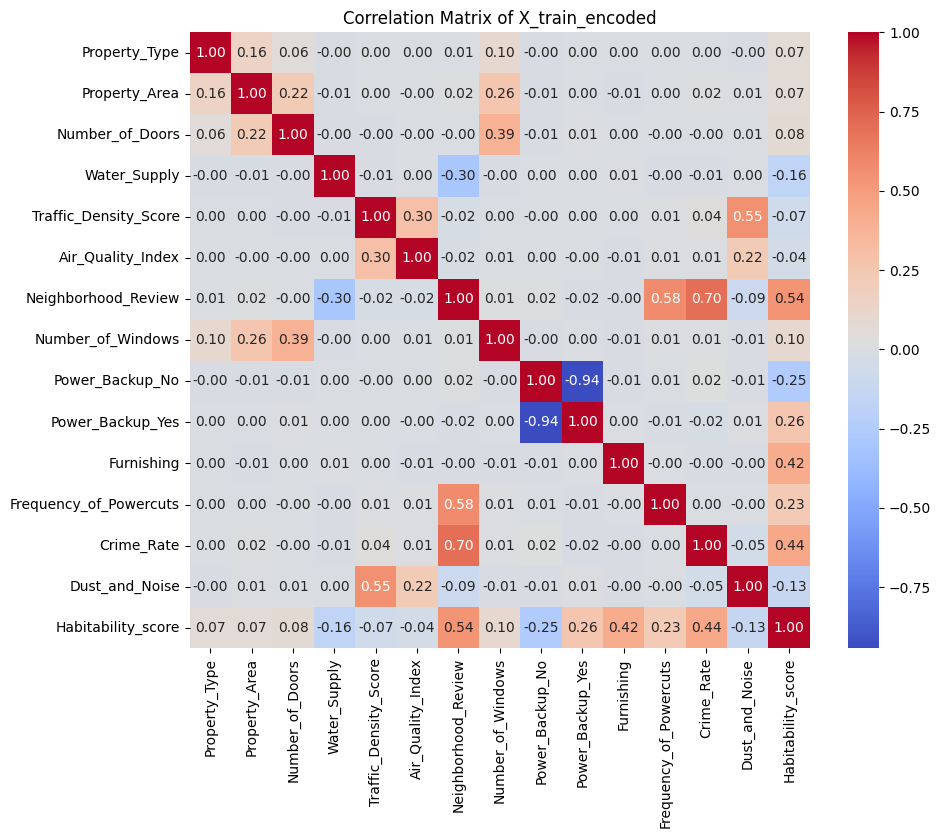

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data for demonstration

X_full = pd.concat([X_train_encoded, y_train],axis = 1)
# Create a heat map using seaborn
corr_matrix = X_full.corr()

# Plotting the correlation matrix as a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of X_train_encoded')
plt.show()

In [34]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [35]:
# mi_scores = make_mi_scores(X_train_encoded, y_train)
# plot_mi_scores(mi_scores)

In [36]:
X_full = pd.concat([X_train_encoded, y_train],axis = 1)

In [37]:
# sns.catplot(x="Property_Area", y="Habitability_score", data=X_full, kind="boxen");

In [38]:
# X_train_encoded.drop(columns=['Number_of_Doors'],axis =1 , inplace = True)
# X_valid_encoded.drop(columns=['Number_of_Doors'],axis =1 , inplace = True)
# X_test_encoded.drop(columns=['Number_of_Doors'],axis =1 , inplace = True)
columns = X_train_encoded.columns
columns


Index(['Property_Type', 'Property_Area', 'Number_of_Doors', 'Water_Supply',
       'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review',
       'Number_of_Windows', 'Power_Backup_No', 'Power_Backup_Yes',
       'Furnishing', 'Frequency_of_Powercuts', 'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

In [39]:
# plt.figure(figsize=(8, 6))
# X_train_encoded.boxplot(column=['Property_Area'], flierprops=dict(markerfacecolor='r', marker='s', label='Outliers'))
# plt.title('Box Plot for X_train ')
# plt.xlabel('Features')
# plt.ylabel('Values')
# plt.show()

In [40]:
predict_and_evaluate(model, X_train_encoded,y_train, X_valid_encoded, y_valid)

Root Mean Squared Error (RMSE) on validation set: 6.19499138489397


In [41]:
param_grid_catboost ={
    'iterations': [750,1000],
    'learning_rate': [0.03],
    'depth': [6,7]
}


In [42]:
from catboost import CatBoostRegressor
model5 = CatBoostRegressor(verbose=False)
# predict_and_evaluate(model5, X_train_encoded,y_train, X_valid_encoded, y_valid)
# grid_search(model5, X_train_encoded,y_train,param_grid_catboost)

In [43]:
model6 = CatBoostRegressor(verbose=False,depth =10, iterations= 960,learning_rate =0.045)
# predict_and_evaluate(model6, X_train_encoded,y_train, X_valid_encoded, y_valid)

In [44]:
model6.fit(X_train_encoded, y_train)
y_test = model6.predict(X_test_encoded)
y_test_df = pd.DataFrame(y_test, columns = ['Habitability_score'], index= X_test_encoded.index)

In [45]:
# default_learning_rate = model5.learning_rate_
# default_depth = model5.depth_
# default_iterations = model5.iterations_

# print("Default Learning Rate:", default_learning_rate)
# print("Default Depth:", default_depth)
# print("Default Iterations:", default_iterations)

In [46]:
y_test_df.head()

,Habitability_score
Id,
0x6808,77.843723
0x6a98,73.935420
0xacc0,76.046385
0x8225,81.427204
0xaee8,73.752145


In [47]:
# y_test_df.to_csv('predicted_values.csv', index=True)

In [48]:
import os

# Specify the path to the file you want to delete
file_path = '/kaggle/working/submission1.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"File '{file_path}' deleted successfully.")
else:
    print(f"File '{file_path}' does not exist.")

File '/kaggle/working/submission1.csv' does not exist.


In [49]:
# current_filename = 'submission.csv'  # Replace 'old_filename.txt' with the current file name
# new_filename = 'submission1.csv'      # Replace 'new_filename.txt' with the new file name

# # Rename the file
# os.rename(current_filename, new_filename)

# # Print a message to confirm the renaming
# print(f"File '{current_filename}' has been renamed to '{new_filename}'.")

In [50]:
y_test_df.to_csv('submission.csv', index=True)